In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
pd.set_option('display.max_columns', None)

In [4]:
dataframe = pd.read_csv('clean_df.csv')

In [7]:
dataframe.rename(columns = {'min salary':'min_salary'}, inplace = True)

In [11]:
dataframe['avg_salary'] = dataframe[['min_salary','max_salary']].mean(axis=1)

In [12]:
dataframe.columns

Index(['Job Description', 'Rating', 'Size', 'Type of ownership', 'Industry',
       'Revenue', 'per_hour', 'employer_provided', 'min_salary', 'max_salary',
       'company_txt', 'State', 'City', 'same_state_hq', 'company_age',
       'jd_python', 'jd_sql', 'jd_excel', 'jd_spark', 'jd_apache', 'jd_r',
       'jd_tensor', 'jd_jupyter', 'jd_git', 'jd_library', 'jd_aws', 'jd_cloud',
       'jd_linux', 'clean_title', 'jd_length', 'comp_count', 'avg_salary'],
      dtype='object')

In [13]:
dataframe = dataframe[['clean_title','company_txt','Job Description', 'Rating', 'Size', 'Type of ownership', 'Industry',
       'Revenue', 'State', 'City', 'company_age','min_salary', 'max_salary', 'avg_salary', 'company_txt', 'comp_count', 
       'per_hour', 'employer_provided','same_state_hq',
       'jd_python', 'jd_sql', 'jd_excel', 'jd_spark', 'jd_apache', 'jd_r',
       'jd_tensor', 'jd_jupyter', 'jd_git', 'jd_library', 'jd_aws', 'jd_cloud',
       'jd_linux']]

In [18]:
df = dataframe.copy()

In [19]:
df_model = df[['avg_salary','Rating', 'Size','Type of ownership','Industry','Revenue', 'State', 'City', 'clean_title' ,
               'company_txt','company_age','company_txt', 'comp_count','per_hour', 'employer_provided','same_state_hq',
               'jd_python', 'jd_sql', 'jd_excel', 'jd_spark', 'jd_apache', 'jd_r',
               'jd_tensor', 'jd_jupyter', 'jd_git', 'jd_library', 'jd_aws', 'jd_cloud',
               'jd_linux' ]]

# Model Build

In [21]:
df_dum = pd.get_dummies(df_model)

In [23]:
X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Multiple Linear Regr

In [31]:
import statsmodels.api as sm

In [32]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)

In [33]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     15.10
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          5.27e-112
Time:                        20:21:44   Log-Likelihood:                -2650.0
No. Observations:                 742   AIC:                             6110.
Df Residuals:                     337   BIC:                             7977.
Df Model:                         404                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Rating                                                              4.5004      1.802      2.498      0.013       0.957       8.044
company_age                                                         0.0872      0.027      3.175      0.002       0.033       0.141
comp_count                                                         -6.0026      3.645     -1.647      0.101     -13.173       1.168
per_hour                                                           -8.2029      4.632     -1.771      0.078     -17.315       0.909
employer_provided                                                  37.9468      6.421      5.909      0.000      25.316      50.578
same_state_hq                                                      56.6159     21.510      2.632      0.009      14.305      98.926
jd_python                                                          -3.5357      3.786     -0.934      0.351     -10.983       3.912
jd_sql                                                             20.4313      3.794      5.385      0.000      12.968      27.894
jd_excel                                                           -5.8297      2.719     -2.144      0.033     -11.178      -0.481
jd_spark                                                          -15.7645      5.620     -2.805      0.005     -26.819      -4.711
jd_apache                                                          42.0868      9.092      4.629      0.000      24.203      59.971
jd_r                                                               11.3815      4.942      2.303      0.022       1.661      21.102
jd_tensor                                                         -24.4795      5.114     -4.787      0.000     -34.538     -14.421
jd_jupyter                                                         18.0163      6.748      2.670      0.008       4.743      31.289
jd_git                                                             -1.3631      4.337     -0.314      0.753      -9.894       7.168
jd_library                                                         21.2366      5.608      3.787      0.000      10.206      32.268
jd_aws                                                              5.8161      5.726      1.016      0.310      -5.447      17.080
jd_cloud                                                            8.6137      6.133      1.404      0.161      -3.450      20.677
jd_linux                                                           -1.2103      7.453     -0.162      0.871     -15.871      13.450
Size_1 to 50 employees                                             -5.0782      3.541     -1.434      0.152     -12.043       1.886
Size_10000+ employees                          

In [42]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-94679028838.13548

# Lasso

In [46]:
lm_l = Lasso(alpha=.04)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))



-18.885223684672713

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.453e+03, tolerance: 4.922e+01
  model = cd_fast.enet_coordinate_descent(


,alpha,error
3,0.04,-18.885224


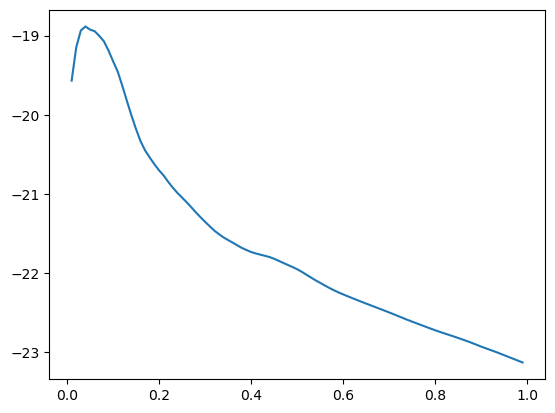

In [44]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

# random forrest

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-16.537132469327428

# Tune RF model using gridsearch

In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [52]:
gs.best_score_


-16.298720066061108

In [51]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=280)

# Test

In [53]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
mean_absolute_error(y_test,tpred_lm)

11481856543.64937

In [56]:
mean_absolute_error(y_test,tpred_lml)

17.077252570732075

In [57]:
mean_absolute_error(y_test,tpred_rf)

13.543577834721333

In [58]:
mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)

14.54955511370909

# Save Model & Predict

In [59]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [60]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [61]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


53.982142857142854